In [36]:
import imaging_behavior_functions
import odor_behavioral_analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
import scipy.io
import os
import mat73
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.interpolate import interp1d
from scipy.stats import iqr
from PIL import Image
import cv2
from IPython.display import display, clear_output
import time
import seaborn as sns
from scipy.stats import iqr
from scipy.ndimage import gaussian_filter1d
import glob
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import plotly.graph_objects as go
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
import tensorflow as tf
from torchsummary import summary

In [2]:
base_path = "C:/Users/wilson/OneDrive - Harvard University/Thesis - Wilson lab/2P imaging/preprocessed data/qualified_sessions/one_trial_sessions/"
example_path_data = base_path+"20230805-4_MBON21hDeltaB_syntGCAMP7f_odor_apple_patchy/data/"
example_path_results = base_path+"20230805-4_MBON21hDeltaB_syntGCAMP7f_odor_apple_patchy/results/"
trial_num = 1
odor_threshold = 5
time_interval_threshold = 16  # Assuming time is in seconds or an equivalent unit
k = 8
window_size = 30

is_mat73, roi_df, dff_raw, kinematics_raw, preprocessed_vars_ds, preprocessed_vars_odor = imaging_behavior_functions.load_intermediate_mat(example_path_data,trial_num)
behav_df = imaging_behavior_functions.make_df_behavior(dff_raw, preprocessed_vars_ds, preprocessed_vars_odor,trial_num,ball_d = 9)
xPos, yPos = imaging_behavior_functions.reconstruct_path(behav_df, ball_d = 9)
roi_names, hdeltab_index, epg_index, hdeltab_sequence, epg_sequence = imaging_behavior_functions.get_roi_seq(roi_df)
dff_all_rois, dff_time = imaging_behavior_functions.load_dff_raw(is_mat73, dff_raw)
neural_df = imaging_behavior_functions.make_df_neural(dff_all_rois, dff_time, roi_names, hdeltab_index, epg_index, hdeltab_sequence, epg_sequence)
behav_df, padded_result_df, smoothed_df = odor_behavioral_analysis.analysis_dfs(behav_df, time_interval_threshold, k, window_size)
combined_df = imaging_behavior_functions.combine_df(behav_df, neural_df)
smoothed_df["translationalV_smoothed"] = np.sqrt(smoothed_df["fwV_smoothed"]**2+smoothed_df["sideV_smoothed"]**2)

c:\Users\wilson\anaconda3\envs\2p_process\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [3]:
smoothed_df

time        fwV      sideV       yawV   heading   abssideV  \
0        0.000000   0.000000   0.000000   0.000000  0.748649   0.000000   
1        0.240513  -0.219713  -1.306855   0.100094  0.749624   1.306855   
2        0.481026  -0.119723  -1.628911   0.059436  0.747587   1.628911   
3        0.721539  -0.303351  -2.169633   0.196950  0.750262   2.169633   
4        0.962052   0.036717  -0.108245  -0.010321  0.751260   0.108245   
...           ...        ...        ...        ...       ...        ...   
7480  1799.036986  10.456535  -2.430525   4.156634  5.742618   2.430525   
7481  1799.277499  -1.282638 -16.646307   8.714621  5.963540  16.646307   
7482  1799.518012   7.348875 -21.653753  11.722968  0.308291  21.653753   
7483  1799.758525   4.704347  12.071842  -8.472140  0.411995  12.071842   
7484  1799.999038   5.293325  -1.808141  -4.710414  6.082821   1.808141   

        absyawV  net_motion  net_motion_state  heading_adj  ...        yPos  \
0      0.000000    0.000000                 0     0.748649  ...    0.000000   
1      0.100094    1.626663                 1     0.749624  ...   -0.070283   
2      0.059436    1.808070                 1     0.747587  ...   -0.120858   
3      0.196950    2.669934                 1     0.750262  ...   -0.222751   
4      0.010321    0.155283                 0     0.751260  ...   -0.215363   
...         ...         ...               ...          ...  ...         ...   
7480   4.156634   17.043694                 1    37.158545  ...  285.030287   
7481   8.714621   26.643566                 1    37.379467  ...  284.579765   
7482  11.722968   40.725596                 1    38.007403  ...  285.793715   
7483   8.472140   25.248329                 1    38.111107  ...  287.067115   
7484   4.710414   11.811880                 1    37.498748  ...  287.067115   

      cluster_label_temporal  soft_cluster_label_temporal  \
0                          0                            0   
1                          0                            0   
2                          0                            0   
3                          0                            0   
4                          0                            0   
...                      ...                          ...   
7480                       0                            0   
7481                       0                            0   
7482                       0                            0   
7483                       0                            0   
7484                       0                            0   

      cluster_label_spatial  fwV_smoothed  sideV_smoothed  yawV_smoothed  \
0                         0     -0.108750       -0.883365       0.059913   
1                         0     -0.099858       -0.957417       0.074882   
2                         0     -0.048625       -1.056604       0.124079   
3                         0      0.110787       -1.228274       0.266880   
4                         0      0.463820       -1.706959       0.604848   
...                     ...           ...             ...            ...   
7480                      5      6.681701       -7.481783       2.490296   
7481                      5      5.981866       -7.410167       2.610321   
7482                      5      5.448869       -6.225567       1.675990   
7483                      5      5.200999       -4.295300       0.056905   
7484                      5      5.138699       -2.820268      -1.196060   

      heading_smoothed  straightness_smoothed  translationalV_smoothed  
0             0.749072               0.750428                 0.890034  
1             0.749577               0.727487                 0.962611  
2             0.751587               0.729715                 1.057722  
3             0.758248               0.736050                 1.233261  
4             0.776593               0.700775                 1.768852  
...                ...                    ...                      ...  
7480  

In [4]:
selected_df = neural_df.drop(columns=['time','MBON21L','MBON21R'])
selected_df

hDeltaB_0  hDeltaB_1  hDeltaB_2  hDeltaB_3  hDeltaB_4  hDeltaB_5  \
0      1.241962   0.383523   0.358444   0.097757   0.011519   0.277770   
1      1.122885   0.373910   0.261601   0.186200   0.079669   0.205932   
2      1.138844   0.295217   0.133648   0.338941   0.132484   0.163215   
3      1.136710   0.232473   0.008637   0.368918   0.121838   0.228631   
4      0.784412   0.284925  -0.013781   0.299948   0.062412   0.358765   
...         ...        ...        ...        ...        ...        ...   
7480   0.220035  -0.130434   0.015037  -0.042719  -0.123742  -0.077967   
7481   0.021527  -0.090348  -0.056911  -0.082641  -0.201801  -0.158782   
7482  -0.275158  -0.050738  -0.134345  -0.031096  -0.246961  -0.211673   
7483  -0.411082  -0.063065  -0.065458   0.032444  -0.249648  -0.194095   
7484  -0.380608  -0.101228   0.033184   0.078122  -0.192836  -0.134129   

      hDeltaB_6  hDeltaB_7  hDeltaB_8  hDeltaB_9  ...  hDeltaB_18  hDeltaB_19  \
0      0.061169   0.180628   0.311270   0.599994  ...    1.916588    2.185271   
1      0.085467   0.182624   0.304660   0.592972  ...    1.910222    2.245278   
2      0.189639   0.194816   0.350617   0.619992  ...    1.882963    2.262364   
3      0.317409   0.236150   0.437271   0.772920  ...    1.810834    2.287551   
4      0.385596   0.301791   0.538747   0.966230  ...    1.811607    2.245671   
...         ...        ...        ...        ...  ...         ...         ...   
7480   0.034825   0.105906   0.426064   1.007740  ...    2.678864    2.692949   
7481   0.034147   0.036600   0.351182   0.793700  ...    2.808143    2.674942   
7482  -0.003561  -0.011629   0.321332   0.716781  ...    2.950979    2.660348   
7483  -0.061058  -0.058695   0.235592   0.660515  ...    2.937907    2.721088   
7484  -0.140061  -0.107429   0.187322   0.511474  ...    2.827494    2.787161   

      hDeltaB_20  hDeltaB_21  hDeltaB_22  hDeltaB_23  hDeltaB_24  hDeltaB_25  \
0       1.999191    2.162483    1.916930    1.971367    1.724920    1.422568   
1       2.006683    2.076988    1.878382    2.054740    1.769468    1.327635   
2       2.080175    2.052068    1.858321    2.050991    1.830000    1.274174   
3       2.155690    2.116092    1.876195    1.937832    1.814542    1.178010   
4       2.199512    2.166246    1.901164    1.879810    1.712413    1.057092   
...          ...         ...         ...         ...         ...         ...   
7480    2.204068    1.894932    1.306142    1.125682    0.694187    0.191132   
7481    2.417434    2.100247    1.446980    1.464223    0.892807    0.474159   
7482    2.594776    2.300975    1.788475    1.732115    1.079645    0.681985   
7483    2.683954    2.458006    2.080824    1.906719    1.199272    0.745784   
7484    2.732945    2.538869    2.150089    1.915252    1.251827    0.720534   

      hDeltaB_26  hDeltaB_27  
0       1.198348    1.322129  
1       1.199988    1.461048  
2       1.266786    1.564603  
3       1.355249    1.511653  
4       1.345140    1.334321  
...          ...         ...  
7480    0.156214    0.164683  
7481    0.244738    0.307505  
7482    0.223644    0.445096  
7483    0.225406    0.542416  
7484    0.248897    0.503591  

[7485 rows x 28 columns]

## PCA

In [5]:
def perform_pca(selected_df, n_components=3):
    """
    Perform PCA on the given dataframe.

    Args:
    - data (pd.DataFrame): The dataframe containing neuron activity data.
    - n_components (int): The number of principal components to compute.

    Returns:
    - pca (PCA object): The PCA object after fitting the data.
    - transformed_data (np.array): Data transformed into principal components.
    - explained_variance_ratio (np.array): The amount of variance explained by each of the selected components.
    """
    # Standardize the data (important for PCA)
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(selected_df)

    # Perform PCA
    pca = PCA(n_components=n_components)
    transformed_data = pca.fit_transform(scaled_data)
    explained_variance_ratio = pca.explained_variance_ratio_

    return pca, transformed_data, explained_variance_ratio
pca, transformed_data, explained_variance_ratio = perform_pca(selected_df,n_components=3)

In [6]:
roi_kw = 'hDeltaB'
roi_mtx = imaging_behavior_functions.extract_heatmap(neural_df, roi_kw, 1, example_path_results, trial_num)
param_df = imaging_behavior_functions.fit_sinusoid(neural_df,roi_mtx)
param_df

time     phase  baseline  amplitude  phase_error  baseline_error  \
0        0.000000  4.188790  0.115561   1.478587     0.064717        0.068432   
1        0.240513  4.188790  0.165476   1.517075     0.067541        0.073189   
2        0.481026  4.188790  0.213279   1.513413     0.074924        0.080917   
3        0.721539  4.188790  0.242901   1.486588     0.081122        0.085901   
4        0.962052  3.956080  0.242280   1.480633     0.077250        0.081279   
...           ...       ...       ...        ...          ...             ...   
7480  1799.036986  3.723369  0.085306   2.184039     0.036784        0.056443   
7481  1799.277499  3.723369  0.120576   2.211595     0.031433        0.049006   
7482  1799.518012  3.956080  0.195965   2.311278     0.034028        0.055570   
7483  1799.758525  3.956080  0.283633   2.411280     0.041650        0.071020   
7484  1799.999038  3.956080  0.335091   2.486768     0.047508        0.083540   

      amplitude_error  
0            0.097852  
1            0.104534  
2            0.115467  
3            0.122365  
4            0.115510  
...               ...  
7480         0.079304  
7481         0.069093  
7482         0.078528  
7483         0.100446  
7484         0.118144  

[7485 rows x 7 columns]

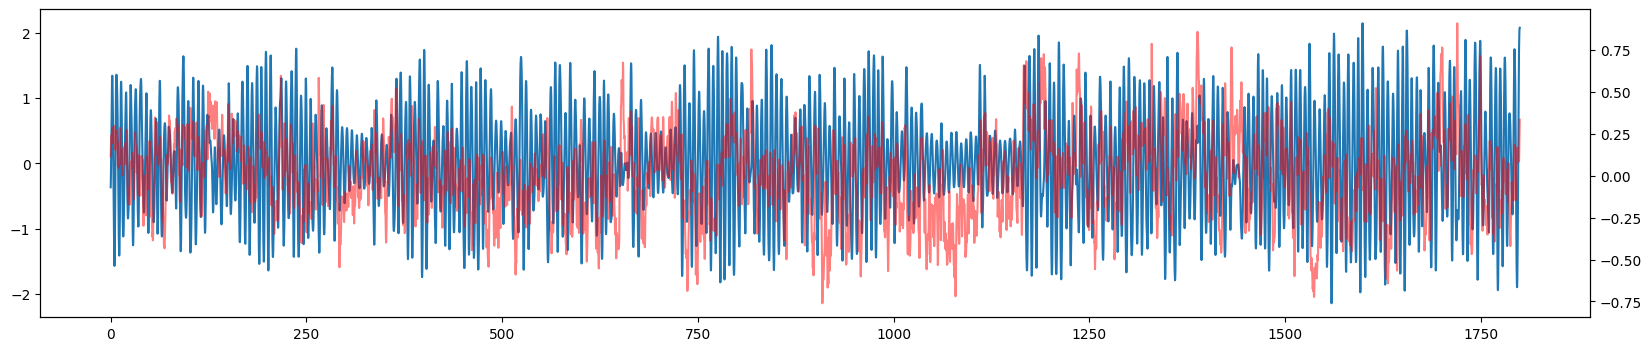

In [7]:
def dynamic_func(x, baseline, amp, phase):
    return amp * np.cos(x + phase)
phasor_rep = dynamic_func(param_df.time, param_df.baseline, param_df.amplitude, param_df.phase)
fig, ax = plt.subplots(figsize = (20,4))
ax.plot(param_df.time, gaussian_filter1d(phasor_rep, sigma=2))
ax2 = ax.twinx()
ax2.plot(param_df.time, param_df.baseline,'r', alpha=0.5)

In [8]:
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2):
        super(MLP, self).__init__()
        # Define the first layer (input to hidden)
        self.hidden1 = nn.Linear(input_size, hidden_size1)
        self.hidden2 = nn.Linear(hidden_size1, hidden_size2)
        # Define the second layer (hidden to output)
        self.output = nn.Linear(hidden_size2, 1)
    
    def forward(self, x):
        # Forward pass through the hidden layer with ReLU activation
        x = F.relu(self.hidden1(x))
        x = F.relu(self.hidden2(x))
        # Forward pass through the output layer
        x = self.output(x)
        return x

In [9]:
# TODO modify
#X = gaussian_filter1d(phasor_rep, sigma=2)
#X = gaussian_filter1d(param_df[['baseline','amplitude','phase']].values, sigma=2)
X = param_df[['baseline','amplitude','phase']].values
X_tensor = torch.tensor(X).float()
y = imaging_behavior_functions.apply_gaussian_smoothing(behav_df.fwV, sigma=2)
#y = behav_df.fwV
y_tensor = torch.tensor(y).float()

split_train = int(len(X_tensor) * 0.6)  # 60% for training
split_val = int(len(X_tensor) * 0.8)  # 20% for validation, 20% for test

# Split the data
X_train, X_val, X_test = X_tensor[:split_train], X_tensor[split_train:split_val], X_tensor[split_val:]
y_train, y_val, y_test = y_tensor[:split_train], y_tensor[split_train:split_val], y_tensor[split_val:]

# Normalize X (Using training data mean and std)
'''mean = X_train.mean(dim=0, keepdim=True)
std = X_train.std(dim=0, keepdim=True)
X_train = (X_train - mean) / std
X_val = (X_val - mean) / std
X_test = (X_test - mean) / std'''

# Assuming y_train and y_test are already tensors and do not need reshaping
y_train = y_train[:, None]  # Reshape if necessary to ensure 2D tensor for consistency
y_val = y_val[:, None]
y_test = y_test[:, None]  # Reshape if necessary
# Data loading
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
val_dataset = TensorDataset(X_val, y_val)
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=False)
val_loader = DataLoader(dataset=val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)

In [31]:
input_size = X_train.shape[1]
hidden_size1 = 2  # Example size, adjust based on performance
hidden_size2 = 2
model = MLP(input_size, hidden_size1, hidden_size2)
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [39]:
summary(model, input_size=(input_size, ))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                    [-1, 2]               8
            Linear-2                    [-1, 2]               6
            Linear-3                    [-1, 1]               3
Total params: 17
Trainable params: 17
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [32]:
epochs = 200
for epoch in range(epochs):
    model.train()
    train_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = loss_function(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    
    # Validation phase
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            y_pred = model(X_batch)
            loss = loss_function(y_pred, y_batch)
            val_loss += loss.item()
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss/len(train_loader):.4f}, Validation Loss: {val_loss/len(val_loader):.4f}')


Epoch [10/200], Train Loss: 3.6508, Validation Loss: 4.0875
Epoch [20/200], Train Loss: 3.3018, Validation Loss: 3.6352
Epoch [30/200], Train Loss: 3.1202, Validation Loss: 3.3002
Epoch [40/200], Train Loss: 3.0628, Validation Loss: 3.1636
Epoch [50/200], Train Loss: 3.0464, Validation Loss: 3.1080
Epoch [60/200], Train Loss: 3.0403, Validation Loss: 3.0828
Epoch [70/200], Train Loss: 3.0371, Validation Loss: 3.0670
Epoch [80/200], Train Loss: 3.0352, Validation Loss: 3.0579
Epoch [90/200], Train Loss: 3.0334, Validation Loss: 3.0517
Epoch [100/200], Train Loss: 3.0320, Validation Loss: 3.0471
Epoch [110/200], Train Loss: 3.0304, Validation Loss: 3.0445
Epoch [120/200], Train Loss: 3.0288, Validation Loss: 3.0435
Epoch [130/200], Train Loss: 3.0272, Validation Loss: 3.0424
Epoch [140/200], Train Loss: 3.0255, Validation Loss: 3.0412
Epoch [150/200], Train Loss: 3.0235, Validation Loss: 3.0398
Epoch [160/200], Train Loss: 3.0216, Validation Loss: 3.0383
Epoch [170/200], Train Loss: 3.01

In [33]:
# Evaluation Loop
model.eval()  # Set model to evaluation mode
predictions = []  # List to store predictions for each batch
train_predictions = []

total_loss = 0
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        y_pred_test = model(X_batch)
        predictions.append(y_pred_test)
        total_loss += loss_function(y_pred_test, y_batch).item()
y_pred_test = torch.cat(predictions, dim=0)
average_loss = total_loss / len(test_loader)
print(f'Average Test Loss: {average_loss:.4f}')

total_train_loss = 0
with torch.no_grad():
    for X_batch, y_batch in train_loader:
        y_pred_train = model(X_batch)
        train_predictions.append(y_pred_train)
        total_train_loss += loss_function(y_pred_train, y_batch).item()
y_pred_train = torch.cat(train_predictions, dim=0)
average_loss = total_train_loss / len(train_loader)
print(f'Average Train Loss: {average_loss:.4f}')


Average Test Loss: 4.3975
Average Train Loss: 2.9698


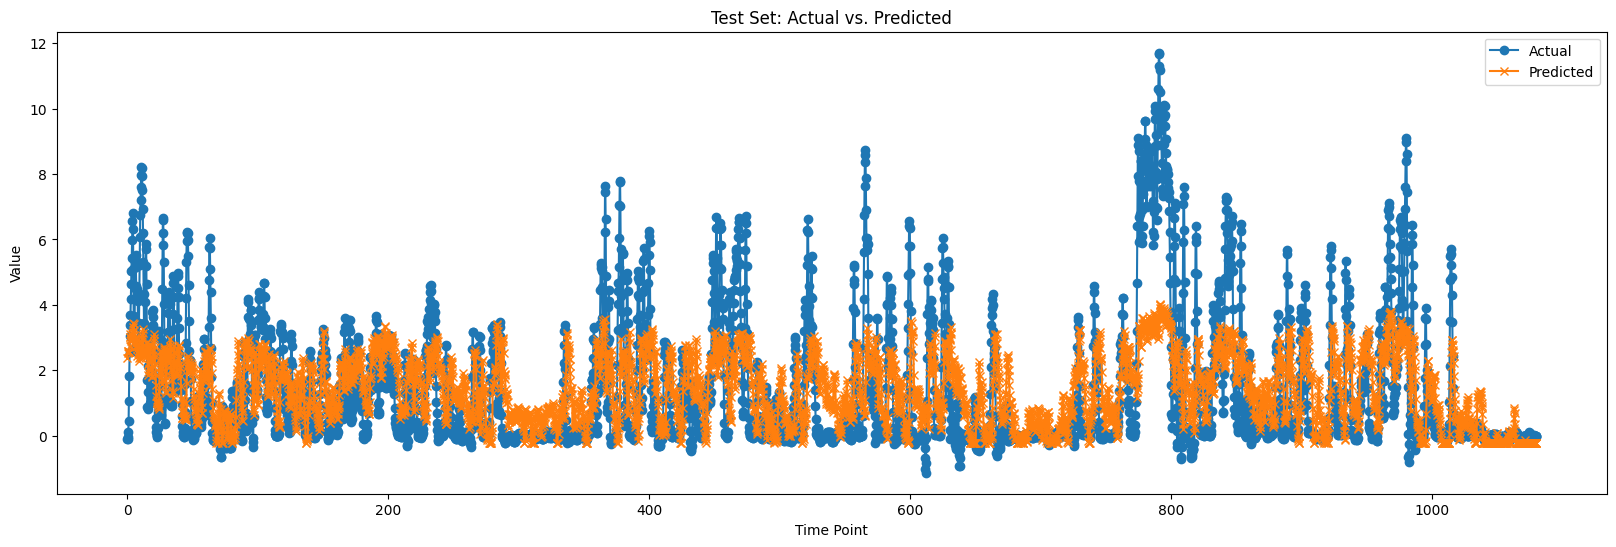

In [34]:
y_pred_train_np = y_pred_train.squeeze().numpy()
y_train_np = y_train.squeeze().numpy()

# Assuming sequential time points for the test set
time_points = behav_df.time[:split_train]

plt.figure(figsize=(20, 6))
plt.plot(time_points, y_train_np, label='Actual', marker='o')
plt.plot(time_points, y_pred_train_np, label='Predicted', marker='x')
plt.title('Test Set: Actual vs. Predicted')
plt.xlabel('Time Point')
plt.ylabel('Value')
plt.legend()
plt.show()

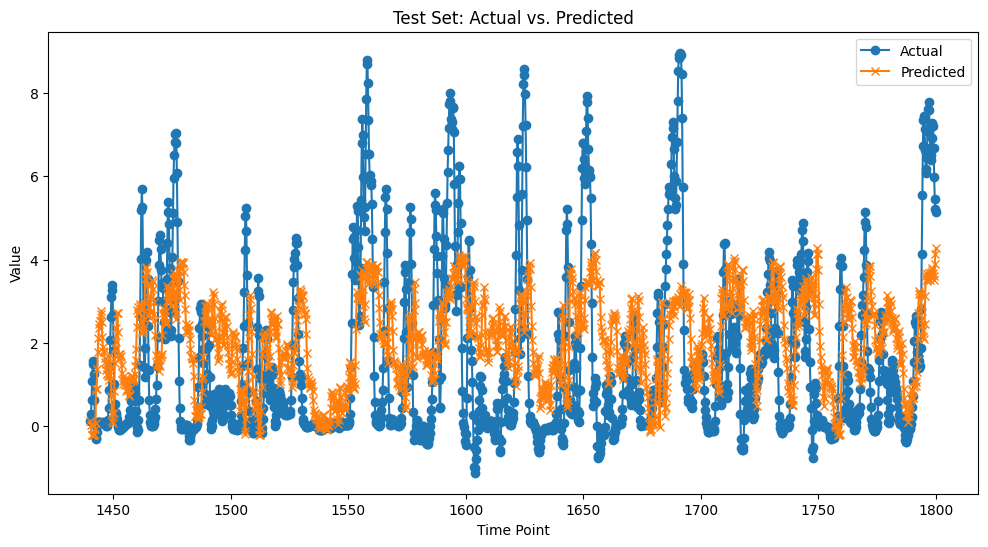

In [35]:
y_pred_test_np = y_pred_test.squeeze().numpy()
y_test_np = y_test.squeeze().numpy()

# Assuming sequential time points for the test set
time_points = behav_df.time[split_val:]

plt.figure(figsize=(12, 6))
plt.plot(time_points, y_test_np, label='Actual', marker='o')
plt.plot(time_points, y_pred_test_np, label='Predicted', marker='x')
plt.title('Test Set: Actual vs. Predicted')
plt.xlabel('Time Point')
plt.ylabel('Value')
plt.legend()
plt.show()


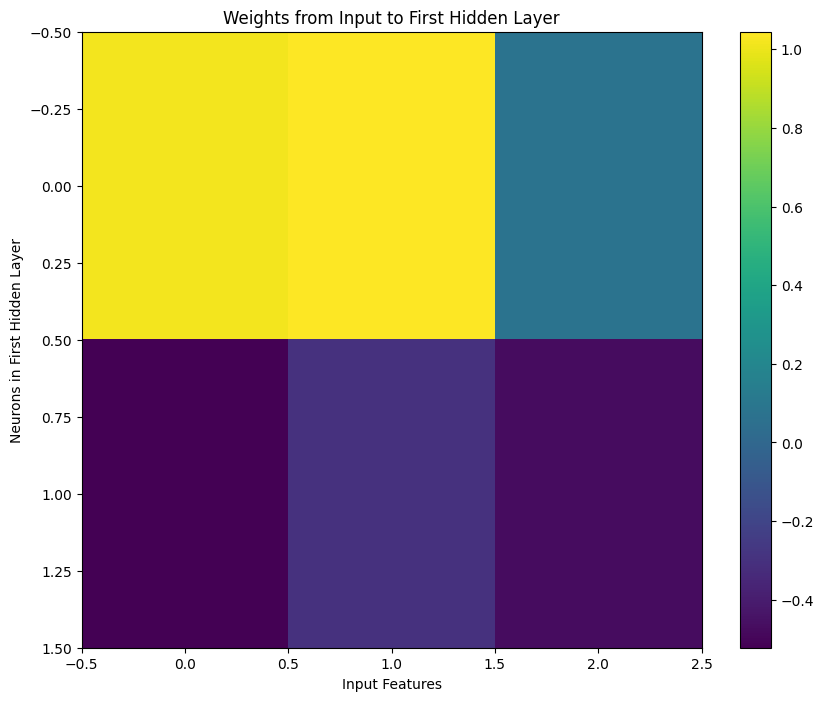

In [41]:
# Extract weights
weights_fc1 = model.hidden1.weight.data.numpy()

# Visualize weights as a heatmap
plt.figure(figsize=(10, 8))
plt.imshow(weights_fc1, cmap='viridis', aspect='auto')
plt.colorbar()
plt.xlabel('Input Features')
plt.ylabel('Neurons in First Hidden Layer')
plt.title('Weights from Input to First Hidden Layer')
plt.show()


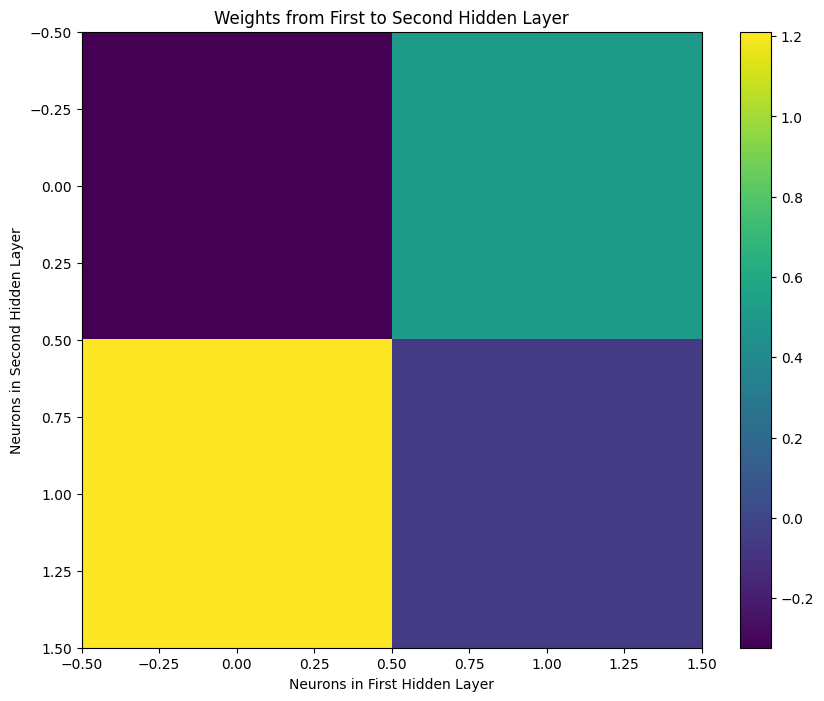

In [45]:
# Extract weights
weights_fc2 = model.hidden2.weight.data.numpy()

# Visualize weights as a heatmap
plt.figure(figsize=(10, 8))
plt.imshow(weights_fc2, cmap='viridis', aspect='auto')
plt.colorbar()
plt.xlabel('Neurons in First Hidden Layer')
plt.ylabel('Neurons in Second Hidden Layer')
plt.title('Weights from First to Second Hidden Layer')
plt.show()


In [30]:
nn_pd = pd.DataFrame()
nn_pd['num_hidden'] = 2
nn_pd['num_per_hidden'] = 5
nn_pd['num_epoch'] = 100
nn_pd['train_loss'] = 2.8474
nn_pd['test_loss'] = 4.8161


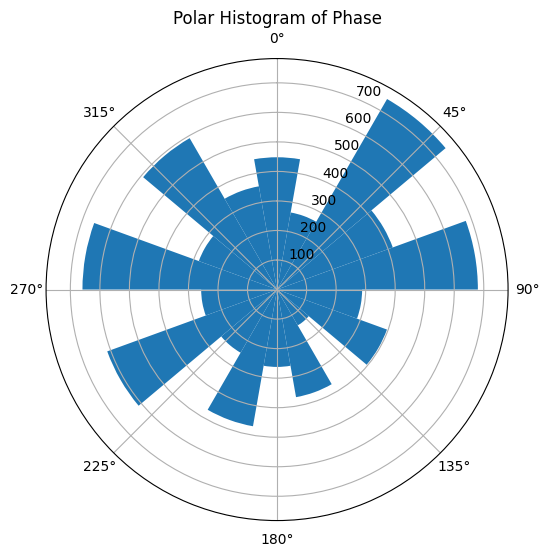

In [22]:
# Create a polar histogram to visualize the distribution of phase values
phase = param_df.phase
num_bins = 18  # Number of bins for the histogram

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, polar=True)
# Compute the histogram
hist, bins = np.histogram(phase, bins=num_bins)
# The width of each bin on the plot
width = 2*np.pi / num_bins

# Make the plot
bars = ax.bar(bins[:-1], hist, width=width, bottom=0.0)

ax.set_title('Polar Histogram of Phase')
ax.set_theta_zero_location('N')  # Set 0 degrees at the top
ax.set_theta_direction(-1)  # Set the direction of rotation clockwise

plt.show()

In [202]:
radius = imaging_behavior_functions.apply_gaussian_smoothing(param_df.amplitude,5)
phase = imaging_behavior_functions.apply_gaussian_smoothing(param_df.phase,5)
time = param_df.time

# Create a polar plot
fig = go.Figure(data=go.Scatterpolar(
    r = radius,
    theta = np.degrees(phase),  # Convert phase from radians to degrees for plotting
    mode = 'markers',  # Display both markers and lines
    marker=dict(size=5, color=time, colorscale='Viridis')
))

# Customize layout
fig.update_layout(
    title='Evolution of Phase-Radius Combination Over Time',
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, np.max(radius)]  # Adjust the range if necessary
        ),
    ),
    showlegend=False
)

# Show the plot
fig.show()


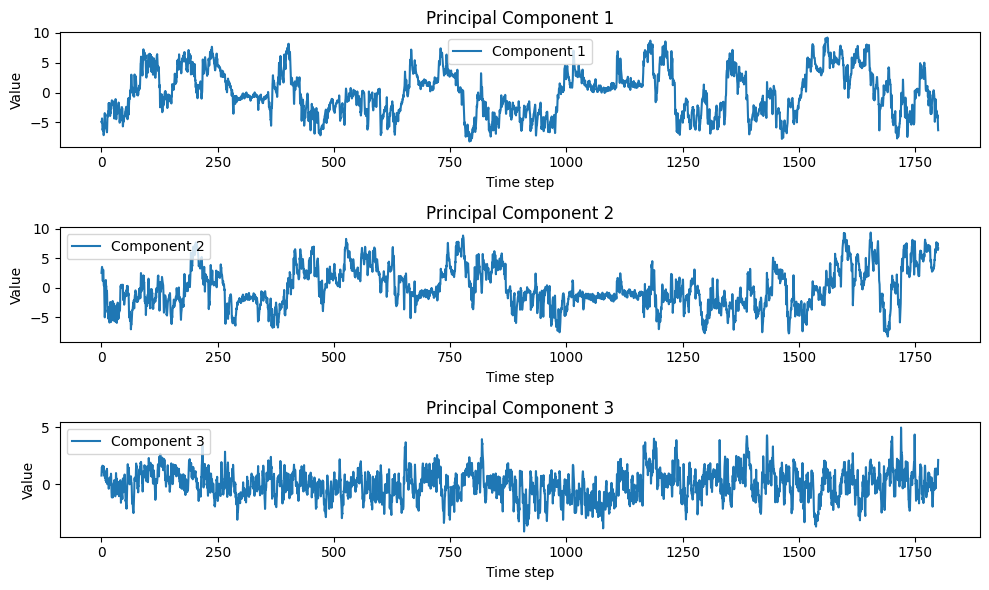

In [89]:
# visualze top PCstime_steps = range(transformed_data.shape[0])

n_components = 3
time_steps = range(transformed_data.shape[0])

# Create a figure with subplots
fig, axes = plt.subplots(n_components, 1, figsize=(10, 2*n_components))

for i in range(n_components):
    ax = axes[i]
    ax.plot(neural_df.time, transformed_data[:, i], label=f'Component {i+1}')
    ax.set_title(f'Principal Component {i+1}')
    ax.set_xlabel('Time step')
    ax.set_ylabel('Value')
    ax.legend()

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

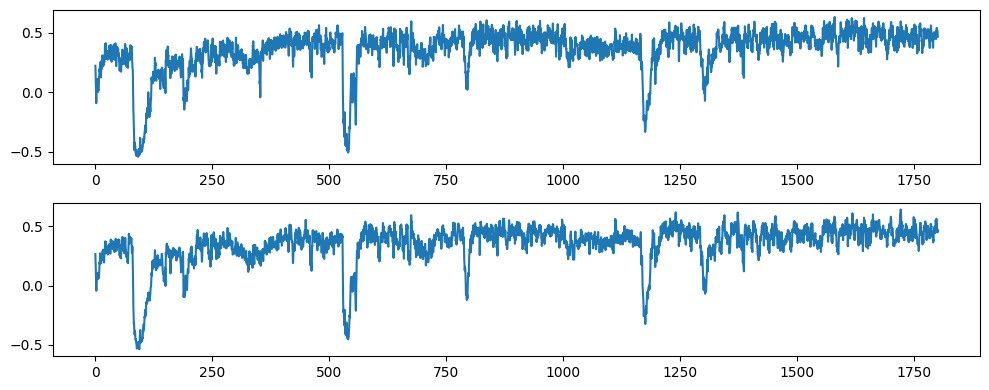

In [95]:
fig, axes = plt.subplots(2, 1, figsize=(10, 4))

axes[0].plot(neural_df.time,neural_df.MBON21L)
axes[1].plot(neural_df.time,neural_df.MBON21R)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

In [135]:
neural_df['mean_MBON21'] = 0.5*(neural_df['MBON21L']+neural_df['MBON21R'])
neural_df['smoothed_MBON21'] = imaging_behavior_functions.apply_gaussian_smoothing(neural_df['mean_MBON21'],5)
MBON21_diff = np.diff(neural_df.smoothed_MBON21)
#plt.hist(MBON21_diff,bins=30)
# Determine the threshold for big drops (95th percentile)
threshold_low = np.percentile(MBON21_diff, 1)
threshold_high = np.percentile(MBON21_diff, 99)
# Identify indices where big drops occur
big_drop_indices = np.where(MBON21_diff <= threshold_low)[0]
big_increase_indices = np.where(MBON21_diff >= threshold_high)[0]

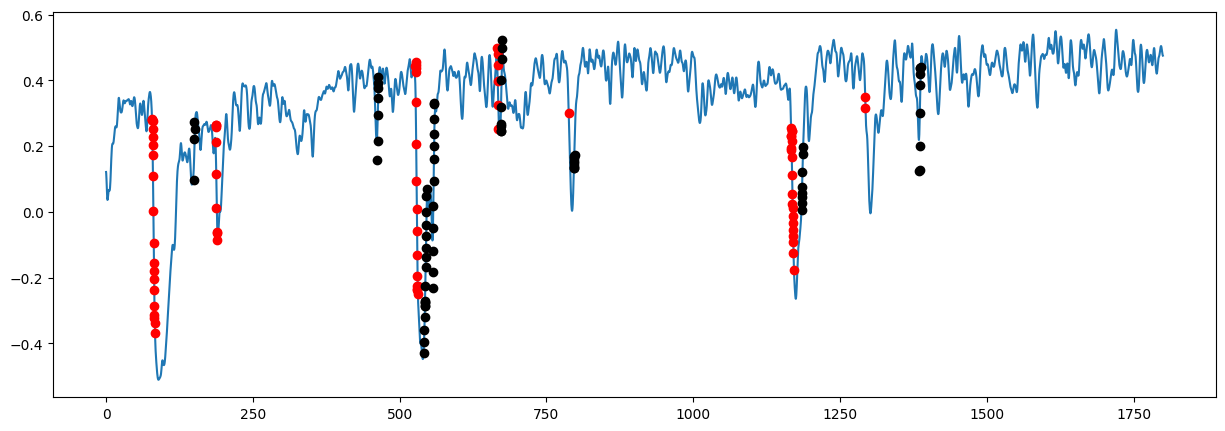

In [136]:
plt.figure(figsize=(15, 5))
plt.plot(neural_df.time, neural_df.smoothed_MBON21, label='Color Variable', zorder=1)
#plt.plot(neural_df.time[:-1], MBON21_diff)
# Highlighting the big drop indices in red
plt.scatter(neural_df.time[big_drop_indices], neural_df.mean_MBON21[big_drop_indices], color='red', label='Big Drops', zorder=2)
plt.scatter(neural_df.time[big_increase_indices], neural_df.mean_MBON21[big_increase_indices], color='black', label='Big Increases', zorder=2)


In [47]:
# Extract the first three PCs
pc1 = transformed_data[:, 0]
pc2 = transformed_data[:, 1]
pc3 = transformed_data[:, 2]

# Time steps for coloring
phase = np.array(param_df.phase)
heading = 2*np.pi - np.array(behav_df.heading)
# Create the figure
fig = go.Figure(data=[go.Scatter3d(
    x=pc1[::4],
    y=pc2[::4],
    z=pc3[::4],
    mode='markers',
    marker=dict(
        size=5,
        color=phase[::4],  # Set color to time steps
        colorscale='Viridis',  # Choose a color scale
        colorbar=dict(title='Phase'),
        opacity=0.8
    )
)])

# Set the layout of the figure
fig.update_layout(
    title='Trajectory of the First 3 Principal Components in State Space',
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    ),
    margin=dict(l=0, r=0, b=0, t=30)
)

# Show the figure
fig.show()


In [196]:
# Extract the first three PCs
pc1 = transformed_data[:, 0]
pc2 = transformed_data[:, 1]
pc3 = transformed_data[:, 2]

# Time steps for coloring
amplitude = np.array(param_df.amplitude)

# Create the figure
fig = go.Figure(data=[go.Scatter3d(
    x=pc1[::4],
    y=pc2[::4],
    z=pc3[::4],
    mode='markers',
    marker=dict(
        size=5,
        color=amplitude[::4],  # Set color to time steps
        colorscale='Viridis',  # Choose a color scale
        colorbar=dict(title='Amplitude'),
        opacity=0.8
    )
)])

# Set the layout of the figure
fig.update_layout(
    title='Trajectory of the First 3 Principal Components in State Space',
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    ),
    margin=dict(l=0, r=0, b=0, t=30)
)

# Show the figure
fig.show()


In [203]:
# Extract the first three PCs
pc1 = transformed_data[:, 0]
pc2 = transformed_data[:, 1]
pc3 = transformed_data[:, 2]

# Time steps for coloring
baseline = np.array(param_df.baseline)

# Create the figure
fig = go.Figure(data=[go.Scatter3d(
    x=pc1[::2],
    y=pc2[::2],
    z=pc3[::2],
    mode='markers',
    marker=dict(
        size=4,
        color=baseline[::2],  # Set color to time steps
        colorscale='Viridis',  # Choose a color scale
        colorbar=dict(title='Baseline'),
        opacity=0.5
    )
)])

'''for idx in big_drop_indices:
    fig.add_trace(go.Scatter3d(x=pc1[idx:idx+2], y=pc2[idx:idx+2], z=pc3[idx:idx+2],
                               mode='lines',
                               line=dict(color='red', width=2)))

for idx in big_increase_indices:
    fig.add_trace(go.Scatter3d(x=pc1[idx:idx+2], y=pc2[idx:idx+2], z=pc3[idx:idx+2],
                               mode='lines',
                               line=dict(color='black', width=2)))'''    
# Set the layout of the figure
fig.update_layout(
    title='Trajectory of the First 3 Principal Components in State Space',
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    ),
    margin=dict(l=0, r=0, b=0, t=30)
)

# Show the figure
fig.show()


In [194]:
# Extract the first three PCs
pc1 = gaussian_filter1d(transformed_data[:, 0], sigma=10)
pc2 = gaussian_filter1d(transformed_data[:, 1],sigma=10)
pc3 = gaussian_filter1d(transformed_data[:, 2],sigma=10)

# Time steps for coloring
#lower_threshold = np.percentile(smoothed_df.fwV_smoothed, 5)
#upper_threshold = np.percentile(smoothed_df.fwV_smoothed, 95)
#color_var = np.abs(np.clip(smoothed_df.fwV_smoothed,lower_threshold, upper_threshold))
color_var = neural_df.time

# Create the figure
fig = go.Figure(data=[go.Scatter3d(
    x=pc1,
    y=pc2,
    z=pc3,
    mode='markers',
    marker=dict(size=5, color=color_var, colorscale='Viridis')
)])

# Set the layout of the figure
fig.update_layout(
    title='Trajectory of the First 3 Principal Components in State Space',
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    ),
    margin=dict(l=0, r=0, b=0, t=30)
)

# Show the figure
fig.show()


In [65]:
padded_result_df.head(1)

Curvature_Mean  Curvature_Std  Tight_Turns  Moderate_Turns  Wide_Turns  \
0             NaN            NaN          NaN             NaN         NaN   

   Heading_Variance  Mean_fwV_sideV_Ratio  Yaw_Velocity_Mean  Yaw_Velocity_Std  
0               NaN                   NaN                NaN               NaN

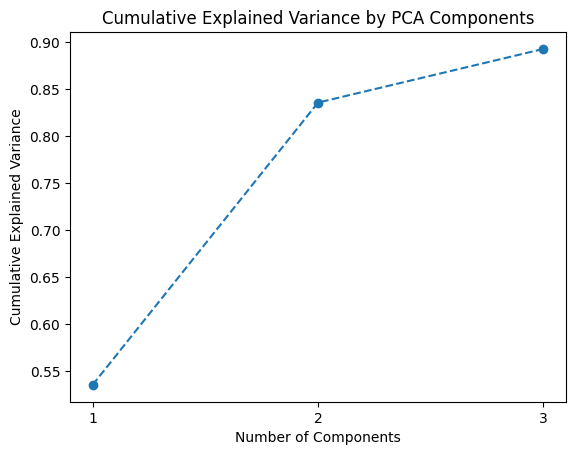

In [77]:
plt.plot(range(1, 4), explained_variance_ratio.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xticks(range(1, 4))
plt.show()

## Attempt 1: clustering (single behavioral var)

In [164]:
def perform_clustering(transformed_data, target_df, behavioral_variable, n_clusters=3):
    """
    Perform K-means clustering on combined neural PCs and a behavioral time series.

    Parameters:
    - neural_pcs: NumPy array or pandas DataFrame with the neural principal components.
    - behav_df: pandas DataFrame containing the behavioral time series.
    - behavioral_variable: string, the column name in behav_df for the behavioral time series.
    - n_clusters: int, the number of clusters to use in K-means.

    Returns:
    - Updates behav_df with a new column 'cluster_labels' containing the cluster labels.
    """
    
    # Ensure the behavioral variable is in the correct format and align lengths
    behavior_series = target_df[behavioral_variable].values.reshape(-1, 1)
    
    # Check if dimensions match
    if len(transformed_data) != len(behavior_series):
        raise ValueError("The lengths of neural PCs and behavioral data do not match.")
    
    # Combine neural PCs and behavioral variable
    combined_data = np.hstack((transformed_data, behavior_series))
    
    # Standardize the combined data
    scaler = StandardScaler()
    standardized_data = scaler.fit_transform(combined_data)
    
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(standardized_data)
    
    # Save cluster labels in behav_df
    target_df[behavioral_variable+'_labels'] = kmeans.labels_
    
    return target_df

# Example usage
# Assuming `neural_pcs` is your PCA components as a NumPy array or DataFrame
# and `behav_df` is your DataFrame with a column 'behavior_var' for the behavioral time series
perform_clustering(transformed_data, neural_df, 'MBON21R', n_clusters=7)

c:\Users\wilson\anaconda3\envs\2p_process\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



time   MBON21L   MBON21R  hDeltaB_0  hDeltaB_1  hDeltaB_2  \
0        0.000000  0.222773  0.264867   1.241962   0.383523   0.358444   
1        0.240513  0.209713  0.237666   1.122885   0.373910   0.261601   
2        0.481026  0.161754  0.212745   1.138844   0.295217   0.133648   
3        0.721539  0.086226  0.170872   1.136710   0.232473   0.008637   
4        0.962052  0.021611  0.116444   0.784412   0.284925  -0.013781   
...           ...       ...       ...        ...        ...        ...   
7480  1799.036986  0.495776  0.447953   0.220035  -0.130434   0.015037   
7481  1799.277499  0.477877  0.464794   0.021527  -0.090348  -0.056911   
7482  1799.518012  0.477426  0.469343  -0.275158  -0.050738  -0.134345   
7483  1799.758525  0.468498  0.453946  -0.411082  -0.063065  -0.065458   
7484  1799.999038  0.467024  0.458304  -0.380608  -0.101228   0.033184   

      hDeltaB_3  hDeltaB_4  hDeltaB_5  hDeltaB_6  ...  hDeltaB_19  hDeltaB_20  \
0      0.097757   0.011519   0.277770   0.061169  ...    2.185271    1.999191   
1      0.186200   0.079669   0.205932   0.085467  ...    2.245278    2.006683   
2      0.338941   0.132484   0.163215   0.189639  ...    2.262364    2.080175   
3      0.368918   0.121838   0.228631   0.317409  ...    2.287551    2.155690   
4      0.299948   0.062412   0.358765   0.385596  ...    2.245671    2.199512   
...         ...        ...        ...        ...  ...         ...         ...   
7480  -0.042719  -0.123742  -0.077967   0.034825  ...    2.692949    2.204068   
7481  -0.082641  -0.201801  -0.158782   0.034147  ...    2.674942    2.417434   
7482  -0.031096  -0.246961  -0.211673  -0.003561  ...    2.660348    2.594776   
7483   0.032444  -0.249648  -0.194095  -0.061058  ...    2.721088    2.683954   
7484   0.078122  -0.192836  -0.134129  -0.140061  ...    2.787161    2.732945   

      hDeltaB_21  hDeltaB_22  hDeltaB_23  hDeltaB_24  hDeltaB_25  hDeltaB_26  \
0       2.162483    1.916930    1.971367    1.724920    1.422568    1.198348   
1       2.076988    1.878382    2.054740    1.769468    1.327635    1.199988   
2       2.052068    1.858321    2.050991    1.830000    1.274174    1.266786   
3       2.116092    1.876195    1.937832    1.814542    1.178010    1.355249   
4       2.166246    1.901164    1.879810    1.712413    1.057092    1.345140   
...          ...         ...         ...         ...         ...         ...   
7480    1.894932    1.306142    1.125682    0.694187    0.191132    0.156214   
7481    2.100247    1.446980    1.464223    0.892807    0.474159    0.244738   
7482    2.300975    1.788475    1.732115    1.079645    0.681985    0.223644   
7483    2.458006    2.080824    1.906719    1.199272    0.745784    0.225406   
7484    2.538869    2.150089    1.915252    1.251827    0.720534    0.248897   

      hDeltaB_27  MBON21R_labels  
0       1.322129               1  
1       1.461048               1  
2       1.564603               1  
3       1.511653               1  
4       1.334321               1  
...          ...             ...  
7480    0.164683               6  
7481    0.307505               6  
7482    0.445096               6  
7483    0.542416               1  
7484    0.503591               1  

[7485 rows x 32 columns]

In [165]:
pc1 = transformed_data[:, 0]
pc2 = transformed_data[:, 1]
pc3 = transformed_data[:, 2]

# Time steps for coloring
#lower_threshold = np.percentile(smoothed_df.fwV_smoothed, 5)
#upper_threshold = np.percentile(smoothed_df.fwV_smoothed, 95)
#color_var = np.abs(np.clip(smoothed_df.fwV_smoothed,lower_threshold, upper_threshold))
color_var = neural_df.MBON21R_labels

# Create the figure
fig = go.Figure(data=[go.Scatter3d(
    x=pc1[::4],
    y=pc2[::4],
    z=pc3[::4],
    mode='markers',
    marker=dict(
        size=5,
        color=color_var[::4],  # Set color to time steps
        colorscale='hot',  # Choose a color scale
        colorbar=dict(title='Cluster Label'),
        opacity=0.8
    )
)])

# Set the layout of the figure
fig.update_layout(
    title='Trajectory of the First 3 Principal Components in State Space',
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    ),
    margin=dict(l=0, r=0, b=0, t=30)
)

# Show the figure
fig.show()


## Behavior

In [145]:
imaging_behavior_functions.plot_fly_traj(behav_df.xPos,behav_df.yPos,behav_df,'odor',example_path_results,1)